In [ ]:
# !pip install geopy

In [61]:
import pandas as pd
import numpy as np
import random
import folium
from folium.plugins import HeatMap
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')
from geopy.geocoders import Nominatim

# read the csv file

In [62]:
airpollute=pd.read_csv('../../data/bronze/Air_pollution.csv', delimiter=';')
airpollute.head()

,City,Location,Coordinates,Country Code,Pollutant,Source Name,Unit,Value,Last Updated,Country
0,Flanders,Belgium - Flanders - 40AB02 - BERENDRECHT,"51.34073,4.3218203",BE,PM10,EEA Belgium,µg/m³,39.2,2017-03-13T13:00:00+01:00,Belgium
1,Brussels,Belgium - Brussels - 41R012 - UCCLE,"50.79663,4.3585386",BE,SO2,EEA Belgium,µg/m³,2.0,2017-07-21T00:00:00+02:00,Belgium
2,Flanders,Belgium - Flanders - 42N046 - GELLIK,"50.882298,5.618874",BE,NO2,EEA Belgium,µg/m³,5.0,2017-07-21T00:00:00+02:00,Belgium
3,Flanders,Belgium - Flanders - 42R897 - ANTWERPEN,"51.250107,4.3421044",BE,SO2,EEA Belgium,µg/m³,0.0,2017-07-21T00:00:00+02:00,Belgium
4,Wallonia,Belgium - Wallonia - 43H201 - LIEGE,"50.624992,5.5474644",BE,SO2,EEA Belgium,µg/m³,0.5,2016-12-21T14:00:00+01:00,Belgium


# split the lat and lon values

In [63]:
# split the coordinates
airpollute['lat'], airpollute['lon'] = airpollute["Coordinates"].str.split(',').str

/tmp/ipykernel_42156/3692081044.py:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  airpollute['lat'], airpollute['lon'] = airpollute["Coordinates"].str.split(',').str


# extract  all the cities from the coordinates

In [64]:
# initialize Nominatim API
geolocator = Nominatim(user_agent="geoapiExercises")

**this can take 15-20 min**

In [ ]:
# location_str = []
# # stream API, translate the geo location data into string of address details
# for i in airpollute['Coordinates'].str.split(','):
#     # append to a list
#     location_str.append(geolocator.reverse(i[0]+","+i[1]))

In [ ]:
# city = []
# # append the 4th value(=city name [3]) into a list
# for i in range(len(airpollute)):
#     city.append(location_str[i][0].split(',')[3].split(' - ')[-1].strip())
# # add the list of city names in the dataframe
# airpollute['Village'] = city

In [ ]:
# # redefine the feature names
# airpollute.columns = ['Region', 'Location', 'Coordinates', 'CountryCode',
#                       'Pollutant', 'SourceName', 'Unit', 'Value', 'LastUpdated',
#                       'Country', 'lat', 'long', 'city']

In [65]:
# # store/save the current results
airpollute.to_csv("../../data/silver/cleaned_air_pollution_df.csv", encoding='utf-8', sep=';', index=False)

In [66]:
# load the last state
airpollute = pd.read_csv("../../data/silver/cleaned_air_pollution_df.csv", encoding='utf-8', sep=';')

In [67]:
location_str = []
# stream API, translate the geo location data into string of address details
for i in airpollute['Coordinates'].str.split(','):
     # append to a list
    location_str.append(geolocator.reverse(i[0]+","+i[1]))

In [68]:
city = []
# append the 4th value(=city name [3]) into a list
for i in range(len(airpollute)):
    city.append(location_str[i][0].split(',')[3].split(' - ')[-1].strip())
# # add the list of city names in the dataframe
airpollute['Village'] = city

In [69]:
airpollute

,City,Location,Coordinates,Country Code,Pollutant,Source Name,Unit,Value,Last Updated,Country,lat,lon,Village
0,Flanders,Belgium - Flanders - 40AB02 - BERENDRECHT,"51.34073,4.3218203",BE,PM10,EEA Belgium,µg/m³,39.2,2017-03-13T13:00:00+01:00,Belgium,51.340730,4.321820,Berendrecht
1,Brussels,Belgium - Brussels - 41R012 - UCCLE,"50.79663,4.3585386",BE,SO2,EEA Belgium,µg/m³,2.0,2017-07-21T00:00:00+02:00,Belgium,50.796630,4.358539,Ukkel
2,Flanders,Belgium - Flanders - 42N046 - GELLIK,"50.882298,5.618874",BE,NO2,EEA Belgium,µg/m³,5.0,2017-07-21T00:00:00+02:00,Belgium,50.882298,5.618874,Lanaken
3,Flanders,Belgium - Flanders - 42R897 - ANTWERPEN,"51.250107,4.3421044",BE,SO2,EEA Belgium,µg/m³,0.0,2017-07-21T00:00:00+02:00,Belgium,51.250107,4.342104,Vlaanderen
4,Wallonia,Belgium - Wallonia - 43H201 - LIEGE,"50.624992,5.5474644",BE,SO2,EEA Belgium,µg/m³,0.5,2016-12-21T14:00:00+01:00,Belgium,50.624992,5.547464,Liège
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,Luxembourg,Belgium - Luxembourg - BETN132,"49.71928,5.630398",BE,O3,EEA Belgium,µg/m³,55.5,2020-12-20T02:00:00+01:00,Belgium,49.719280,5.630398,Virton
611,Oost-Vlaanderen,Belgium - Oost-Vlaanderen - BETR701,"51.05833,3.729298",BE,PM2.5,EEA Belgium,µg/m³,7.5,2020-12-20T02:00:00+01:00,Belgium,51.058330,3.729298,Gent
612,Antwerpen,Belgium - Antwerpen - BETR801,"51.209663,4.431821",BE,PM2.5,EEA Belgium,µg/m³,7.0,2020-12-20T02:00:00+01:00,Belgium,51.209663,4.431821,Borgerhout
613,Antwerpen,Belgium - Antwerpen - BETR831,"51.348797,4.3397098",BE,NO2,EEA Belgium,µg/m³,10.0,2020-12-20T02:00:00+01:00,Belgium,51.348797,4.339710,Berendrecht


# keep useful variables

In [72]:
# airpollute['city'] = city
airpollute['Date'] = pd.to_datetime(airpollute['Last Updated'], format='%Y-%m-%d')
airpollute['Year'] = list(map(lambda x: int(x.year), airpollute.Date))
# airpo['lat']=airpollute.Coordinates.str.split(',', expand = True)[0]
# airpo['long']=airpollute.Coordinates.str.split(',', expand = True)[1]
air_new=airpollute[['lon', 'lat','Coordinates', 'Pollutant', 'Value', 'Village', 'Year']]

In [73]:
air_new

,lon,lat,Coordinates,Pollutant,Value,Village,Year
0,4.321820,51.340730,"51.34073,4.3218203",PM10,39.2,Berendrecht,2017
1,4.358539,50.796630,"50.79663,4.3585386",SO2,2.0,Ukkel,2017
2,5.618874,50.882298,"50.882298,5.618874",NO2,5.0,Lanaken,2017
3,4.342104,51.250107,"51.250107,4.3421044",SO2,0.0,Vlaanderen,2017
4,5.547464,50.624992,"50.624992,5.5474644",SO2,0.5,Liège,2016
...,...,...,...,...,...,...,...
610,5.630398,49.719280,"49.71928,5.630398",O3,55.5,Virton,2020
611,3.729298,51.058330,"51.05833,3.729298",PM2.5,7.5,Gent,2020
612,4.431821,51.209663,"51.209663,4.431821",PM2.5,7.0,Borgerhout,2020
613,4.339710,51.348797,"51.348797,4.3397098",NO2,10.0,Berendrecht,2020


# graph the amount of pollution for each pollutant

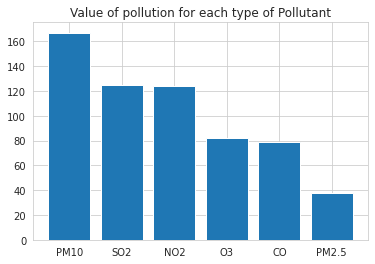

In [74]:
# count the pollutant
pollute=list(air_new.Pollutant.unique())
Pollute_counts=air_new.Pollutant.value_counts()
plt.bar(pollute, Pollute_counts)
plt.title('Value of pollution for each type of Pollutant')
plt.show()

In [75]:
air_new.value_counts()

lon       lat        Coordinates          Pollutant  Value   Village         Year
2.582323  51.016280  51.01628,2.5823228   NO2        4.000   Veurne          2017    1
4.521130  50.416435  50.416435,4.52113    PM10       5.271   Châtelet        2020    1
4.504183  50.914577  50.914577,4.5041833  PM2.5      6.000   Humelgem        2020    1
4.512184  50.913020  50.91302,4.512184    NO2        4.000   Steenokkerzeel  2020    1
                                                     26.000  Steenokkerzeel  2017    1
                                                                                    ..
4.341005  51.170300  51.1703,4.341005     PM2.5      7.000   Hoboken         2020    1
                                          SO2        1.000   Hoboken         2017    1
                                                     2.000   Hoboken         2020    1
4.341280  51.264290  51.26429,4.34128     NO2        8.000   Antwerpen       2020    1
6.002329  50.628860  50.62886,6.002329    SO2   

<AxesSubplot:xlabel='Pollutant', ylabel='count'>

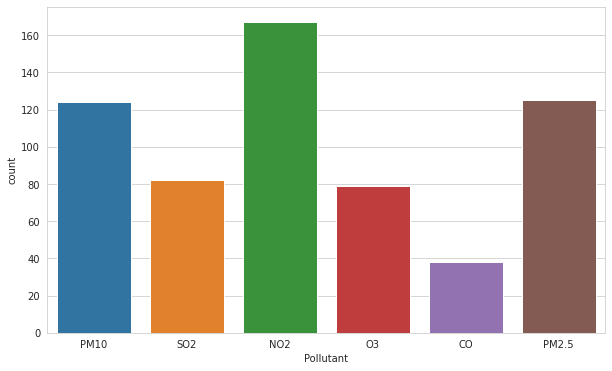

In [92]:
plt.figure(figsize=(10,6))
sns.countplot(x='Pollutant', data=air_new)

# find the ratio of pollution for each city using Antwerpen as reference city for full data

In [78]:
# pollution ratio
ll = air_new.drop_duplicates(subset=['Village'])
ll=ll[['Village', 'lon', 'lat']]
ll=ll.sort_values(by=['Village'])

city_pollute=air_new.groupby(['Village'],as_index=False).Value.sum()
city_pollute=city_pollute.join(ll.set_index('Village'), on='Village')
city_pollute['total']=max(city_pollute.Value)     # yes better than sum() ! now ratio is between 0 and 1
city_pollute['pollute_ratio']=city_pollute.Value/city_pollute['total']
#city_pollute['Location']=airpo['Location']
city_pollute['year']=air_new['Year']
city_pollute.sample(5)     # better to take a sample

,Village,Value,lon,lat,total,pollute_ratio,year
21,Gent,529.685,3.729298,51.058330,625.58,0.846710,2020
57,Ukkel,144.100,4.358539,50.796630,625.58,0.230346,2017
52,Stad Brussel,171.415,4.382963,50.883560,625.58,0.274010,2017
8,Brugge,15.000,3.248624,51.278965,625.58,0.023978,2017
37,Lange Velden,16.000,3.716119,51.088960,625.58,0.025576,2020


# find the ratio of pollution for each city using Antwerpen as reference city for 2020 data

In [79]:
air2020=air_new[air_new.Year==2020]
city_pollute2020=air2020.groupby(['Village'],as_index=False).Value.sum()
city_pollute2020=city_pollute2020.join(ll.set_index('Village'), on='Village')
city_pollute2020['max']=max(city_pollute2020.Value)
city_pollute2020['pollute_ratio']=city_pollute2020.Value/city_pollute2020['max']
city_pollute2020['year']=air_new['Year']
city_pollute2020

,Village,Value,lon,lat,max,pollute_ratio,year
0,Antwerpen,199.000,4.380104,51.092000,199.0,1.000000,2017
1,Assenede,6.500,3.687296,51.190315,199.0,0.032663,2017
2,Baelen,56.771,6.002329,50.628860,199.0,0.285281,2017
3,Bastogne,108.682,6.001736,50.303207,199.0,0.546141,2017
4,Beekkwartier,25.600,3.121155,50.953180,199.0,0.128643,2016
...,...,...,...,...,...,...,...
58,Viroinval,62.957,4.594763,50.095684,199.0,0.316367,2017
59,Virton,61.916,5.630398,49.719280,199.0,0.311136,2020
60,Vlaanderen,104.200,4.342104,51.250107,199.0,0.523618,2020
61,Zelzate,97.185,3.822920,51.196064,199.0,0.488367,2020


# for each type of polllutant, graph the amount of pollution for each city in 2020

In [93]:
import numpy as np
import pandas as pd
import dtale
import pandas_profiling as pp
from IPython.display import Javascript
from plotly.offline import iplot, init_notebook_mode

In [96]:
# generate a data report to get a feel of the data (EDA)
d = dtale.show(air_new, host="20.223.36.46", port="40000", ignore_duplicate=True, drop_index=True, reaper_on=False)
# show all running instances
d.main_url()

http://20.223.36.46:40000/dtale/main/2
Exception on /dtale/charts/_dash-update-component [POST]
Traceback (most recent call last):
  File "/anaconda/envs/py38_datareport/lib/python3.8/site-packages/flask/app.py", line 2073, in wsgi_app
    response = self.full_dispatch_request()
  File "/anaconda/envs/py38_datareport/lib/python3.8/site-packages/flask/app.py", line 1518, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/anaconda/envs/py38_datareport/lib/python3.8/site-packages/flask/app.py", line 1516, in full_dispatch_request
    rv = self.dispatch_request()
  File "/anaconda/envs/py38_datareport/lib/python3.8/site-packages/flask/app.py", line 1502, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**req.view_args)
  File "/anaconda/envs/py38_datareport/lib/python3.8/site-packages/dash/dash.py", line 1345, in dispatch
    response.set_data(func(*args, outputs_list=outputs_list))
  File "/anaconda/envs/py38_datareport/lib/python3.

2022-03-27 13:38:36,812 - ERROR    - Exception on /dtale/charts/_dash-update-component [POST]
Traceback (most recent call last):
  File "/anaconda/envs/py38_datareport/lib/python3.8/site-packages/flask/app.py", line 2073, in wsgi_app
    response = self.full_dispatch_request()
  File "/anaconda/envs/py38_datareport/lib/python3.8/site-packages/flask/app.py", line 1518, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/anaconda/envs/py38_datareport/lib/python3.8/site-packages/flask/app.py", line 1516, in full_dispatch_request
    rv = self.dispatch_request()
  File "/anaconda/envs/py38_datareport/lib/python3.8/site-packages/flask/app.py", line 1502, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**req.view_args)
  File "/anaconda/envs/py38_datareport/lib/python3.8/site-packages/dash/dash.py", line 1345, in dispatch
    response.set_data(func(*args, outputs_list=outputs_list))
  File "/anaconda/envs/py38_datareport/lib/python3.8/

Exception on /dtale/charts/_dash-update-component [POST]
Traceback (most recent call last):
  File "/anaconda/envs/py38_datareport/lib/python3.8/site-packages/flask/app.py", line 2073, in wsgi_app
    response = self.full_dispatch_request()
  File "/anaconda/envs/py38_datareport/lib/python3.8/site-packages/flask/app.py", line 1518, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/anaconda/envs/py38_datareport/lib/python3.8/site-packages/flask/app.py", line 1516, in full_dispatch_request
    rv = self.dispatch_request()
  File "/anaconda/envs/py38_datareport/lib/python3.8/site-packages/flask/app.py", line 1502, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**req.view_args)
  File "/anaconda/envs/py38_datareport/lib/python3.8/site-packages/dash/dash.py", line 1345, in dispatch
    response.set_data(func(*args, outputs_list=outputs_list))
  File "/anaconda/envs/py38_datareport/lib/python3.8/site-packages/dash/_callback.py", lin

2022-03-27 13:41:55,989 - ERROR    - Exception on /dtale/charts/_dash-update-component [POST]
Traceback (most recent call last):
  File "/anaconda/envs/py38_datareport/lib/python3.8/site-packages/flask/app.py", line 2073, in wsgi_app
    response = self.full_dispatch_request()
  File "/anaconda/envs/py38_datareport/lib/python3.8/site-packages/flask/app.py", line 1518, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/anaconda/envs/py38_datareport/lib/python3.8/site-packages/flask/app.py", line 1516, in full_dispatch_request
    rv = self.dispatch_request()
  File "/anaconda/envs/py38_datareport/lib/python3.8/site-packages/flask/app.py", line 1502, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**req.view_args)
  File "/anaconda/envs/py38_datareport/lib/python3.8/site-packages/dash/dash.py", line 1345, in dispatch
    response.set_data(func(*args, outputs_list=outputs_list))
  File "/anaconda/envs/py38_datareport/lib/python3.8/

Exception on /dtale/charts/_dash-update-component [POST]
Traceback (most recent call last):
  File "/anaconda/envs/py38_datareport/lib/python3.8/site-packages/flask/app.py", line 2073, in wsgi_app
    response = self.full_dispatch_request()
  File "/anaconda/envs/py38_datareport/lib/python3.8/site-packages/flask/app.py", line 1518, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/anaconda/envs/py38_datareport/lib/python3.8/site-packages/flask/app.py", line 1516, in full_dispatch_request
    rv = self.dispatch_request()
  File "/anaconda/envs/py38_datareport/lib/python3.8/site-packages/flask/app.py", line 1502, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**req.view_args)
  File "/anaconda/envs/py38_datareport/lib/python3.8/site-packages/dash/dash.py", line 1345, in dispatch
    response.set_data(func(*args, outputs_list=outputs_list))
  File "/anaconda/envs/py38_datareport/lib/python3.8/site-packages/dash/_callback.py", lin

2022-03-27 13:42:54,386 - ERROR    - Exception on /dtale/charts/_dash-update-component [POST]
Traceback (most recent call last):
  File "/anaconda/envs/py38_datareport/lib/python3.8/site-packages/flask/app.py", line 2073, in wsgi_app
    response = self.full_dispatch_request()
  File "/anaconda/envs/py38_datareport/lib/python3.8/site-packages/flask/app.py", line 1518, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/anaconda/envs/py38_datareport/lib/python3.8/site-packages/flask/app.py", line 1516, in full_dispatch_request
    rv = self.dispatch_request()
  File "/anaconda/envs/py38_datareport/lib/python3.8/site-packages/flask/app.py", line 1502, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**req.view_args)
  File "/anaconda/envs/py38_datareport/lib/python3.8/site-packages/dash/dash.py", line 1345, in dispatch
    response.set_data(func(*args, outputs_list=outputs_list))
  File "/anaconda/envs/py38_datareport/lib/python3.8/

In [95]:
air_new

,lon,lat,Coordinates,Pollutant,Value,Village,Year
0,4.321820,51.340730,"51.34073,4.3218203",PM10,39.2,Berendrecht,2017
1,4.358539,50.796630,"50.79663,4.3585386",SO2,2.0,Ukkel,2017
2,5.618874,50.882298,"50.882298,5.618874",NO2,5.0,Lanaken,2017
3,4.342104,51.250107,"51.250107,4.3421044",SO2,0.0,Vlaanderen,2017
4,5.547464,50.624992,"50.624992,5.5474644",SO2,0.5,Liège,2016
...,...,...,...,...,...,...,...
610,5.630398,49.719280,"49.71928,5.630398",O3,55.5,Virton,2020
611,3.729298,51.058330,"51.05833,3.729298",PM2.5,7.5,Gent,2020
612,4.431821,51.209663,"51.209663,4.431821",PM2.5,7.0,Borgerhout,2020
613,4.339710,51.348797,"51.348797,4.3397098",NO2,10.0,Berendrecht,2020


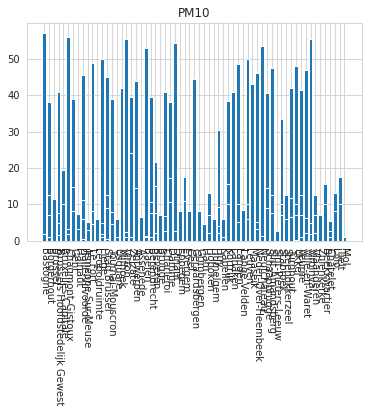

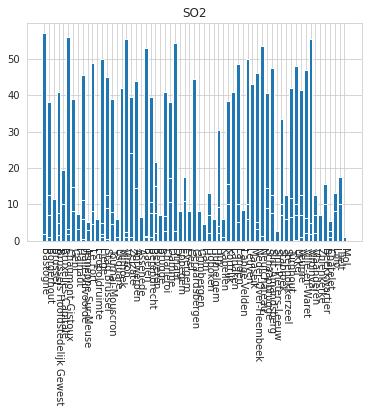

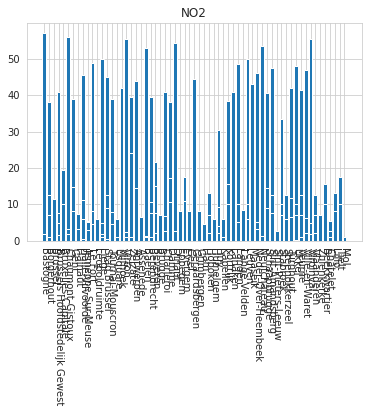

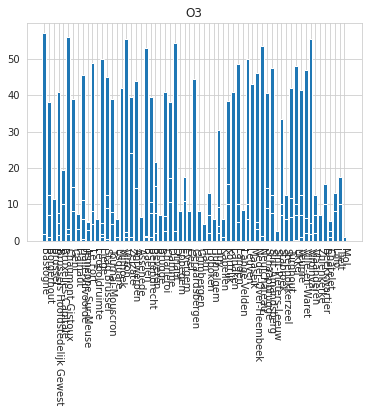

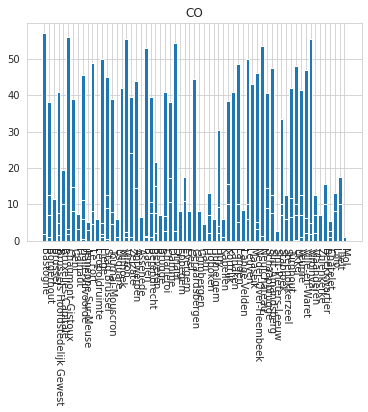

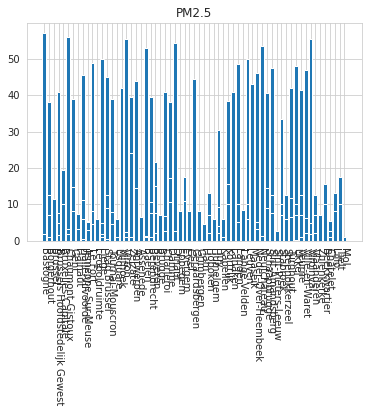

In [82]:
#for each type of pollutant, compare the amount of pollution within countries
# for 2020 and after
airpo1=air_new[air_new.Year==2020]
airbypo=airpo1.groupby(['Pollutant', 'Village'],as_index=False).first()
Pollutant=list(air_new.Pollutant.unique())
for p in Pollutant:
    plt.figure()
    plt.bar(airbypo.Village, airbypo.Value)
    plt.xticks(rotation=270)
    plt.title(p)

# amount of pollution for each city using full data

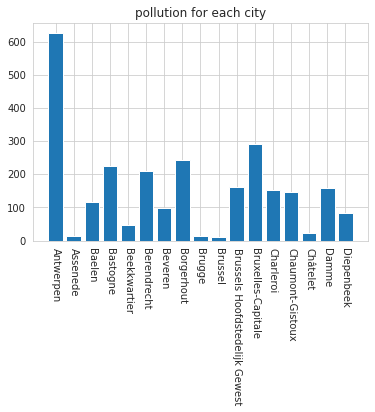

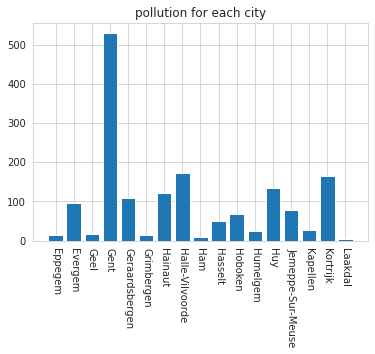

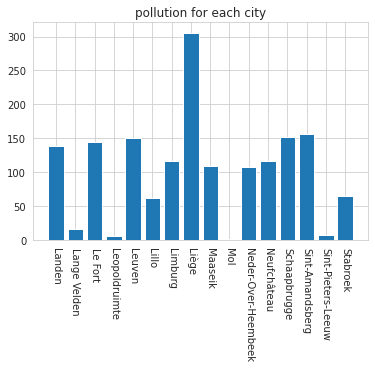

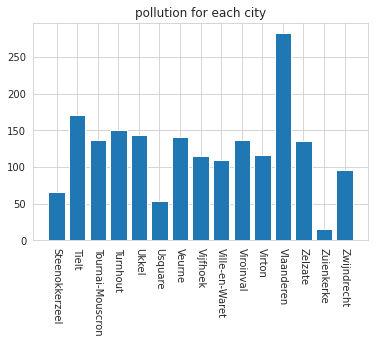

In [83]:
plt.bar(city_pollute.Village[0:17], city_pollute.Value[0:17])
plt.xticks(rotation=270)
plt.title('pollution for each city')
plt.show()
# average

plt.bar(city_pollute.Village[18:35], city_pollute.Value[18:35])
plt.xticks(rotation=270)
plt.title('pollution for each city')
plt.show()

plt.bar(city_pollute.Village[36:52], city_pollute.Value[36:52])
plt.xticks(rotation=270)
plt.title('pollution for each city')
plt.show()

plt.bar(city_pollute.Village[53:68], city_pollute.Value[53:68])
plt.xticks(rotation=270)
plt.title('pollution for each city')
plt.show()

# amount of pollution for each city in 2020

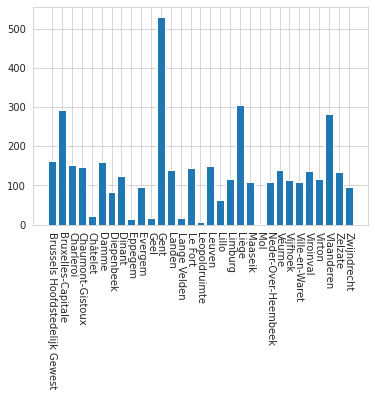

In [84]:
#bar plot for pollution 2020
city_p2020=city_pollute[city_pollute.year==2020]
plt.bar(city_p2020.Village, city_p2020.Value)
plt.xticks(rotation=270)
plt.show()

In [85]:
city_pollute

,Village,Value,lon,lat,total,pollute_ratio,year
0,Antwerpen,625.580,4.380104,51.092000,625.58,1.000000,2017
1,Assenede,13.500,3.687296,51.190315,625.58,0.021580,2017
2,Baelen,117.728,6.002329,50.628860,625.58,0.188190,2017
3,Bastogne,226.596,6.001736,50.303207,625.58,0.362217,2017
4,Beekkwartier,48.300,3.121155,50.953180,625.58,0.077208,2016
...,...,...,...,...,...,...,...
63,Virton,116.906,5.630398,49.719280,625.58,0.186876,2020
64,Vlaanderen,282.600,4.342104,51.250107,625.58,0.451741,2020
65,Zelzate,135.185,3.822920,51.196064,625.58,0.216095,2020
66,Zuienkerke,15.000,3.174984,51.245865,625.58,0.023978,2018


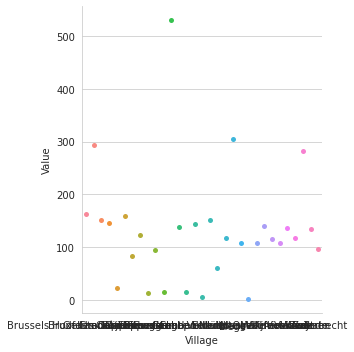

In [86]:
sns.catplot(x='Village', y='Value', data=city_pollute[city_pollute.year==2020])

# heat map 

In [88]:
#heat map 
def generateBaseMap(loc, zoom=9, tiles='OpenStreetMap', crs='ESPG2263'):
    return folium.Map(location=loc,
                   control_scale=True, 
                   zoom_start=zoom,
                   tiles=tiles)

MAP = [city_pollute.lat[0],city_pollute.lon[0]] 
  
base_map = generateBaseMap(MAP)

#city_pollute['Values']=city_pollute['Value']/100
map_values1 = city_pollute[['lat','lon','pollute_ratio']]

data = map_values1.values.tolist()
           
hm = HeatMap(data,gradient={0.1: 'blue', 0.3: 'lime', 0.5: 'yellow', 0.8: 'orange',1: 'red'}, 
                min_opacity=0.05, 
                max_opacity=0.9, 
                radius=25,
                use_local_extrema=False)#.add_to(base_map)

#base_map
base_map.add_child(hm)

# interactive map

In [89]:
# interactive map
def plot_map(df_select, i_df, i_scale):
    zoom_factor = 8 # inital map size
    radius_scaling = i_scale # scaling of bubbles

    my_map = folium.Map(location=[50.5,4], zoom_start=zoom_factor)

    for i in range(0,df_select.shape[0]):
        folium.CircleMarker(
          location=[df_select.iloc[i]['lat'], df_select.iloc[i]['lon']],
          radius=np.sqrt(df_select.iloc[i]['Value'])*radius_scaling,
          popup='city: ' + df_select.iloc[i]['Village'] + '\n Value: ' + str(df_select.iloc[i]['Value']),
          color='red',
          fill=True,
          fill_color='red',
          fill_opacity=0.25,
          weight=1 # stroke width in pixels
       ).add_to(my_map)

    return(my_map)

# for full data

In [90]:
#for each city, proportion of all kinds of pollution
my_map = plot_map(city_pollute,i_df=city_pollute, i_scale=1)
my_map

# map for 2020

In [91]:
#for each city, proportion of all kinds of pollution in 2020
my_map = plot_map(city_pollute2020,i_df=city_pollute2020, i_scale=1)
my_map

In [ ]:
firms=city_p2020.City
market_share=city_p2020.pollute_ratio
plt.pie(market_share,  labels=firms, autopct='%1.1f%%')
plt.show()

#pie graph for all year
firms=city_pollute.City
market_share=city_pollute.pollute_ratio
plt.pie(market_share,  labels=firms, autopct='%1.1f%%')
plt.show()

In [ ]:
airpo=airpollute[['City', 'Location','Pollutant' , 'Value','Coordinates', 'Country','Last Updated']]

long_lat=airpo.Coordinates.str.split(',', expand = True)
airpo['lat']=long_lat[0]
airpo['long']=long_lat[1]
#airpo=airpo[['City', 'Location','Pollutant' , 'Value','long', 'lat','Country', 'Last Updated']]
airpo['Date'] = pd.to_datetime(airpo['Last Updated'], format='%Y-%m-%d')
airpo['Year'] = list(map(lambda x: int(x.year), airpo.Date))
#经度在前



airpollute['city']=pd.DataFrame(city)
airpollute.sort_values(by='city').head()